Time Series Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#find available dataset names in seaborn
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [3]:
df = sns.load_dataset('flights')
print(df.head())
print(df.tail())

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121
     year month  passengers
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432


In [5]:
#Here we only have months and year with us so we also need day so

df['yearMonth'] = '01-'+df['month'].astype(str)+"-"+df['year'].astype(str)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
 3   yearMonth   144 non-null    object  
dtypes: category(1), int64(2), object(1)
memory usage: 4.0+ KB
None
   year month  passengers    yearMonth
0  1949   Jan         112  01-Jan-1949
1  1949   Feb         118  01-Feb-1949
2  1949   Mar         132  01-Mar-1949
3  1949   Apr         129  01-Apr-1949
4  1949   May         121  01-May-1949


In [6]:
#The near columns is of type object(string) so we need to convert it into data format
df['yearMonth'] = pd.to_datetime(df['yearMonth'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        144 non-null    int64         
 1   month       144 non-null    category      
 2   passengers  144 non-null    int64         
 3   yearMonth   144 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 4.0 KB
None


In [7]:
#Make the yearmonth column as dataframe index
df.set_index('yearMonth',inplace = True)
#inplace makes the changes permanent to df

print(df.head())

            year month  passengers
yearMonth                         
1949-01-01  1949   Jan         112
1949-02-01  1949   Feb         118
1949-03-01  1949   Mar         132
1949-04-01  1949   Apr         129
1949-05-01  1949   May         121


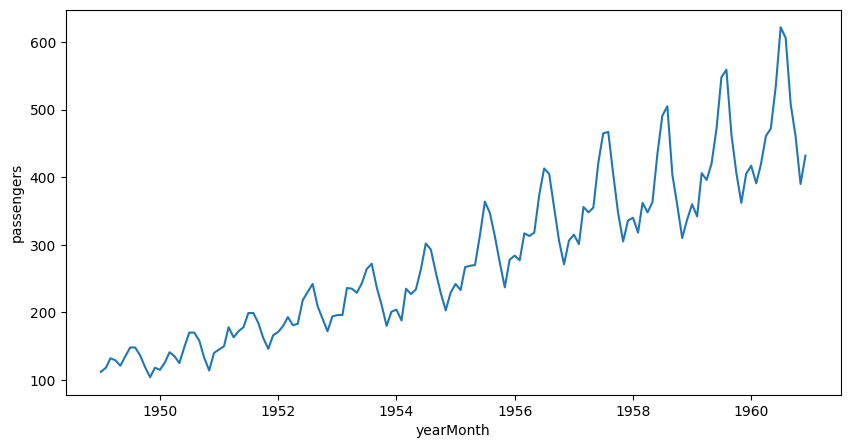

In [8]:
#Visualize the time series
plt.figure(figsize = (10,5))
sns.lineplot(data = df,x = df.index, y = df.passengers)
plt.show()

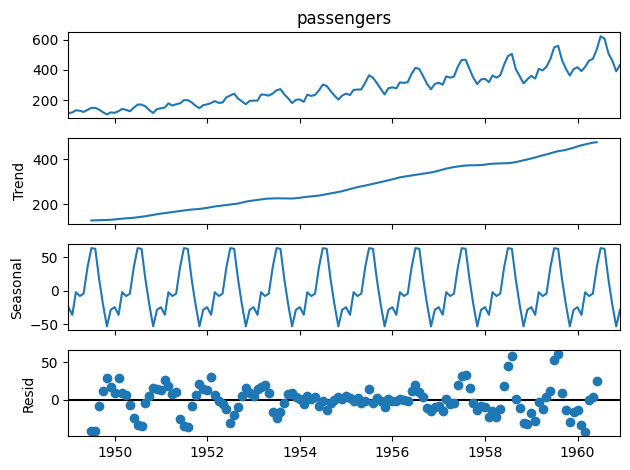

In [12]:
#check further seasonality and trends by doing decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df.passengers,period = 12)
fig = decomposition.plot()
plt.show()

upwards trend and clear seasonality 

In [13]:
#check if the time series is stationary
#rolling mean and standard deviations for 12 months

df['rollMean'] = df.passengers.rolling(window = 12).mean()
df['rollStd'] = df.passengers.rolling(window = 12).std()

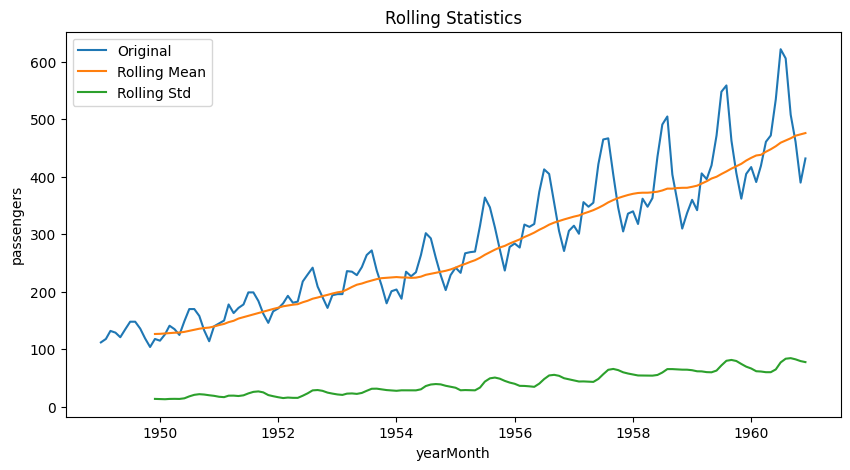

In [17]:
# Plot the original series with rolling mean and std
plt.figure(figsize = (10,5))
sns.lineplot(data = df,x = df.index, y = df.passengers, label = 'Original')
sns.lineplot(data = df, x = df.index, y = df.rollMean,  label = 'Rolling Mean')
sns.lineplot(data = df, x  =df.index, y = df.rollStd, label = 'Rolling Std')
plt.title("Rolling Statistics")
plt.show()

1. mean is NOT straight line
2. std deviation is in a straight line

Conclusion: Our time series is NOT in stationary line

ADF p_value : 0.9919
Time series is not stationary (fail to reject H0)


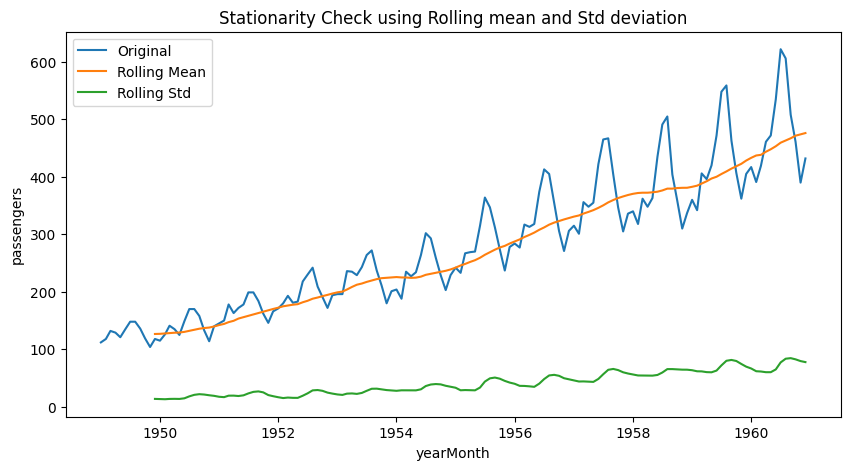

In [20]:
#Define the function for stationarity check (only p-value based)
def test_stationarity(dataFrame, var):
    dataFrame['rollMean'] = dataFrame[var].rolling(window = 12).mean()
    dataFrame['rollStd'] = dataFrame[var].rolling(window = 12).std()

    from statsmodels.tsa.stattools import adfuller
    adf_result = adfuller(dataFrame[var])
    p_value = adf_result[1]

    print(f"ADF p_value : {p_value:.4f}")
    if p_value < 0.05:
        print("Time series is stationary (rejected H0)")
    else:
        print(f"Time series is not stationary (fail to reject H0)")

    #Plot
    plt.figure(figsize= (10,5))
    sns.lineplot(data = dataFrame, x = dataFrame.index, y = var, label = "Original")
    sns.lineplot(data = dataFrame, x = dataFrame.index, y = dataFrame.rollMean, label = "Rolling Mean")
    sns.lineplot(data = dataFrame, x = dataFrame.index, y = 'rollStd', label = "Rolling Std")
    plt.title("Stationarity Check using Rolling mean and Std deviation")
    plt.legend()
    plt.show()

#Call the function to test stationarity
test_stationarity(df,'passengers')

            passengers  shift  shiftDiff
yearMonth                               
1949-01-01         112    NaN        NaN
1949-02-01         118  112.0        6.0
1949-03-01         132  118.0       14.0
1949-04-01         129  132.0       -3.0
1949-05-01         121  129.0       -8.0
1949-06-01         135  121.0       14.0
1949-07-01         148  135.0       13.0
1949-08-01         148  148.0        0.0
1949-09-01         136  148.0      -12.0
1949-10-01         119  136.0      -17.0
1949-11-01         104  119.0      -15.0
1949-12-01         118  104.0       14.0
1950-01-01         115  118.0       -3.0
1950-02-01         126  115.0       11.0
1950-03-01         141  126.0       15.0
1950-04-01         135  141.0       -6.0
1950-05-01         125  135.0      -10.0
1950-06-01         149  125.0       24.0
1950-07-01         170  149.0       21.0
1950-08-01         170  170.0        0.0
ADF p_value : 0.0542
Time series is not stationary (fail to reject H0)


C:\Users\dbda.STUDENTSDC\AppData\Local\Temp\ipykernel_9776\3420590241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window = 12).mean()
C:\Users\dbda.STUDENTSDC\AppData\Local\Temp\ipykernel_9776\3420590241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window = 12).std()


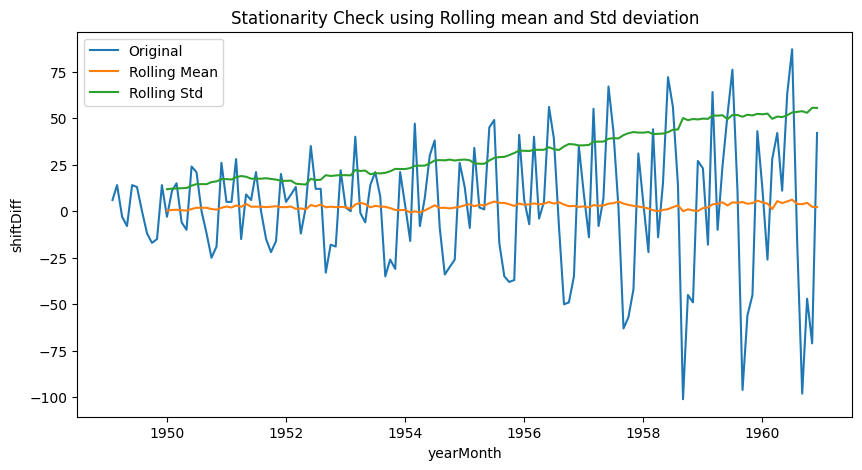

In [ ]:
#Just get the passangers columns into a new data frame for easier testing 

air_df = df[['passengers']].copy()

#Try a shift diff of 1
air_df['shift'] = air_df.passengers.shift(1)
air_df['shiftDiff'] =  air_df['passengers'] - air_df['shift']
print(air_df.head(20))

#Test stationarity
test_stationarity(air_df.dropna(), 'shiftDiff')

# Conclusion the data has somewhat become stationary

            passengers  shift  shiftDiff
yearMonth                               
1949-01-01         112    NaN        NaN
1949-02-01         118    NaN        NaN
1949-03-01         132  112.0       20.0
1949-04-01         129  118.0       11.0
1949-05-01         121  132.0      -11.0
1949-06-01         135  129.0        6.0
1949-07-01         148  121.0       27.0
1949-08-01         148  135.0       13.0
1949-09-01         136  148.0      -12.0
1949-10-01         119  148.0      -29.0
1949-11-01         104  136.0      -32.0
1949-12-01         118  119.0       -1.0
1950-01-01         115  104.0       11.0
1950-02-01         126  118.0        8.0
1950-03-01         141  115.0       26.0
1950-04-01         135  126.0        9.0
1950-05-01         125  141.0      -16.0
1950-06-01         149  135.0       14.0
1950-07-01         170  125.0       45.0
1950-08-01         170  149.0       21.0
ADF p_value : 0.0386
Time series is stationary (rejected H0)


C:\Users\dbda.STUDENTSDC\AppData\Local\Temp\ipykernel_9776\3420590241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window = 12).mean()
C:\Users\dbda.STUDENTSDC\AppData\Local\Temp\ipykernel_9776\3420590241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window = 12).std()


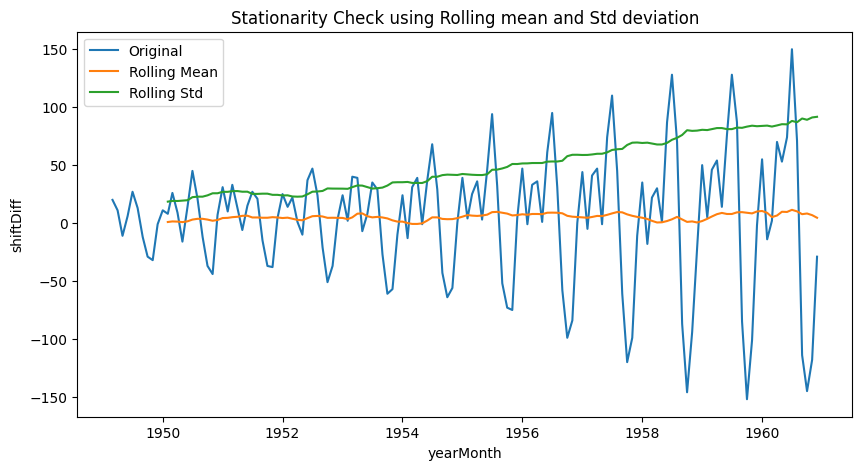

In [24]:
#Try a shift diff of 2
air_df['shift'] = air_df.passengers.shift(2)
air_df['shiftDiff'] =  air_df['passengers'] - air_df['shift']
print(air_df.head(20))

#Test stationarity
test_stationarity(air_df.dropna(), 'shiftDiff')

# Conclusion the data has somewhat become stationary